<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [28]:
import numpy as np
import pandas as pd 


%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
plt.rc("savefig", dpi=300)
plt.rc('figure', dpi=300)
plt.rc('text', usetex=True)
plt.rc('font', size=12)
plt.rc('xtick', direction='in') 
plt.rc('ytick', direction='in')
plt.rc('xtick.major', pad=5) 
plt.rc('xtick.minor', pad=5)
plt.rc('ytick.major', pad=5) 
plt.rc('ytick.minor', pad=5)
plt.rc('lines', dotted_pattern = [0.5, 1.1])

font={'weight':'bold',
     'size': 12}
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (7,5)

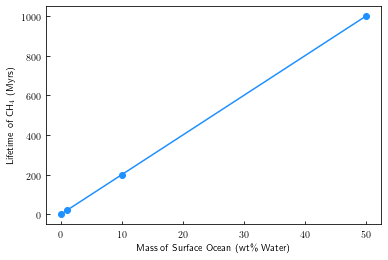

In [3]:
#Mass of Surface Oceans for Earth-Size Planets with Titan-like initial volatile inventories

M_Ocean = [0.1,1.0,10.0,50.0]
CH4_LT = [2.0, 20.0, 200.0, 1000.0]

fig,ax = plt.subplots()
plt.plot(M_Ocean, CH4_LT, '-o', color='dodgerblue')
plt.ylabel(r'Lifetime of CH$_4$ (Myrs)')
plt.xlabel(r'Mass of Surface Ocean (wt\% Water)')
#plt.yscale('log')
#plt.xscale('log')
plt.show()

In [4]:
M_Earth=5.97E24 #kg
s_per_yr = (60*60*24*365)
SA_Earth = 5.1E18 #cm^2

def methane_lifetime(SurfOcean_Perc):
    M_CH4= (SurfOcean_Perc/100.0)*M_Earth*(0.35/100)
    Escape_Flux = 5.0E12 #molec/cm^2/s, diffusion-limited
    Molec_CH4 = (M_CH4 * 1e3 * 6e23)/16.04
    CH4_lifetime = Molec_CH4/(Escape_Flux * SA_Earth * s_per_yr)
    return CH4_lifetime/1e6 #return in Myrs



In [5]:
SurfOcean_arr = np.arange(0.1,51,5)
print(SurfOcean_arr)

SurfOcean_arrlog = np.logspace(-2,2,75)
print(SurfOcean_arrlog)

[ 0.1  5.1 10.1 15.1 20.1 25.1 30.1 35.1 40.1 45.1 50.1]
[1.00000000e-02 1.13254132e-02 1.28264983e-02 1.45265393e-02
 1.64519059e-02 1.86324631e-02 2.11020343e-02 2.38989257e-02
 2.70665207e-02 3.06539530e-02 3.47168682e-02 3.93182876e-02
 4.45295851e-02 5.04315949e-02 5.71158648e-02 6.46860766e-02
 7.32596543e-02 8.29695852e-02 9.39664831e-02 1.06420924e-01
 1.20526094e-01 1.36500781e-01 1.54592774e-01 1.75082703e-01
 1.98288395e-01 2.24569800e-01 2.54334576e-01 2.88044415e-01
 3.26222201e-01 3.69460121e-01 4.18428851e-01 4.73887961e-01
 5.36697695e-01 6.07832313e-01 6.88395207e-01 7.79636013e-01
 8.82969996e-01 1.00000000e+00 1.13254132e+00 1.28264983e+00
 1.45265393e+00 1.64519059e+00 1.86324631e+00 2.11020343e+00
 2.38989257e+00 2.70665207e+00 3.06539530e+00 3.47168682e+00
 3.93182876e+00 4.45295851e+00 5.04315949e+00 5.71158648e+00
 6.46860766e+00 7.32596543e+00 8.29695852e+00 9.39664831e+00
 1.06420924e+01 1.20526094e+01 1.36500781e+01 1.54592774e+01
 1.75082703e+01 1.98288395e+

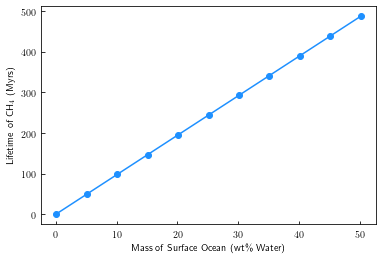

In [6]:
fig,ax = plt.subplots()
plt.plot(SurfOcean_arr, methane_lifetime(SurfOcean_arr), '-o', color='dodgerblue')
plt.ylabel(r'Lifetime of CH$_4$ (Myrs)')
plt.xlabel(r'Mass of Surface Ocean (wt\% Water)')
#plt.yscale('log')
#plt.xscale('log')
plt.show()

In [7]:
## Set-up Range of Volatile Inventories to Explore:

def methane_lifetime_calc(SurfOcean_Perc, CH4):
    M_CH4= (SurfOcean_Perc/100.0)*M_Earth*(CH4)
    Escape_Flux = 5.0E12 #molec/cm^2/s, diffusion-limited
    Molec_CH4 = (M_CH4 * 1e3 * 6e23)/16.04
    CH4_lifetime = Molec_CH4/(Escape_Flux * SA_Earth * s_per_yr)
    return CH4_lifetime/1e6, SurfOcean_Perc, CH4 #return in Myrs

def explorevols(numTrials, SurfOcean_Perc):
    Results_Vals=[]
    for iTrial in range(numTrials):
        CH4_inv = np.random.uniform(0.0001, 0.01)
        for i in SurfOcean_Perc:
            res = methane_lifetime_calc(i,CH4_inv)
            Results_Vals.append(res)
    RES_DF = pd.DataFrame(data=Results_Vals, columns=['CH4_lt','SurfOcean_Perc', 'CH4_inv'])
    return(RES_DF)


In [8]:
res_try = explorevols(1000, SurfOcean_arr)
res_trylog = explorevols(1000, SurfOcean_arrlog)

In [9]:
print(np.min(res_trylog['CH4_inv']))

0.0001202098177955242


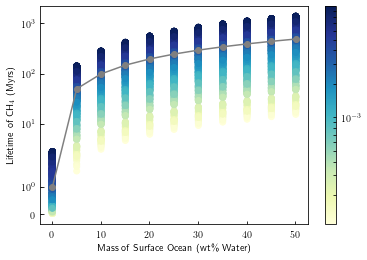

In [10]:
fig,ax = plt.subplots()
plt.scatter(res_try['SurfOcean_Perc'], res_try['CH4_lt'], c=res_try['CH4_inv'], norm=matplotlib.colors.LogNorm(), cmap='YlGnBu')
plt.plot(SurfOcean_arr, methane_lifetime(SurfOcean_arr), '-o', color='grey')
plt.colorbar()
plt.ylabel(r'Lifetime of CH$_4$ (Myrs)')
plt.xlabel(r'Mass of Surface Ocean (wt\% Water)')
plt.yscale('symlog')
#plt.ylim(0,1e5)
plt.show()

/Users/maggiethompson/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


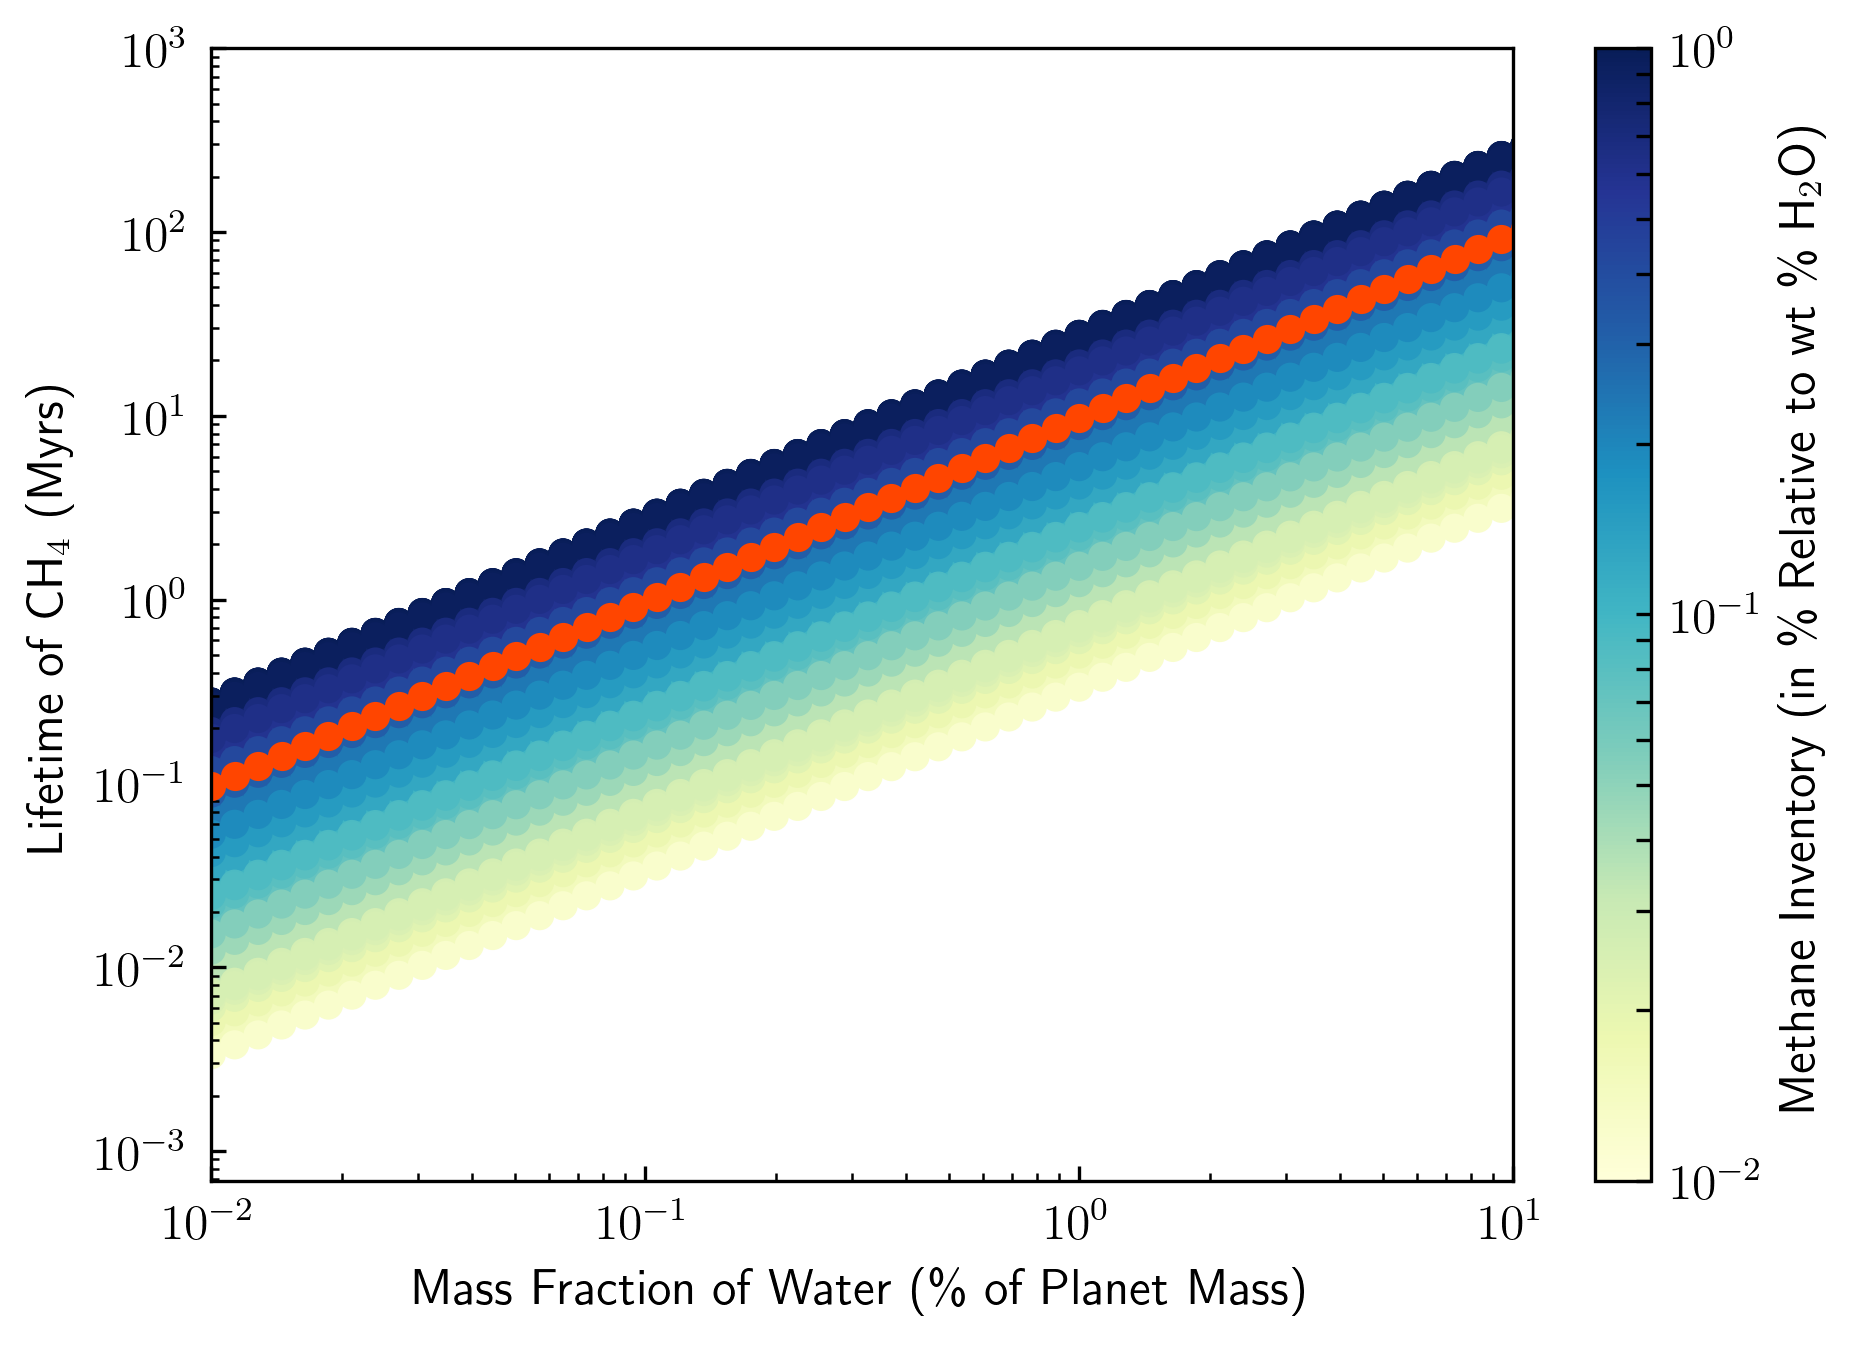

In [34]:
fig,ax = plt.subplots()
plt.scatter(res_trylog['SurfOcean_Perc'], res_trylog['CH4_lt'], c=res_trylog['CH4_inv']*100, norm=matplotlib.colors.LogNorm(), cmap='YlGnBu')
plt.plot(SurfOcean_arrlog, methane_lifetime(SurfOcean_arrlog), '-o', color='orangered')
plt.colorbar(label=r'Methane Inventory (in \% Relative to wt \% H$_2$O)')
plt.clim(1e-2, 1)
plt.ylabel(r'Lifetime of CH$_4$ (Myrs)')
plt.xlabel(r'Mass Fraction of Water (\% of Planet Mass)')
plt.tick_params(axis='y', which='minor')
plt.yscale('log')
plt.ylim(0,1e3)
plt.xscale('log')
plt.xlim(1e-2,10)
plt.savefig('TitanCH4VolInvsvsSurfOcean.jpg', dpi=1000)
plt.show()

In [12]:
print(methane_lifetime(SurfOcean_arrlog))

[9.71946756e-02 1.10076986e-01 1.24666734e-01 1.41190227e-01
 1.59903765e-01 1.81097621e-01 2.05100538e-01 2.32284833e-01
 2.63072170e-01 2.97940101e-01 3.37429474e-01 3.82152820e-01
 4.32803858e-01 4.90168250e-01 5.55135795e-01 6.28714223e-01
 7.12044833e-01 8.06420192e-01 9.13304185e-01 1.03435472e+00
 1.17144946e+00 1.32671491e+00 1.50255945e+00 1.70171065e+00
 1.92725762e+00 2.18269888e+00 2.47199666e+00 2.79963835e+00
 3.17070610e+00 3.59095566e+00 4.06690564e+00 4.60593866e+00
 5.21641583e+00 5.90780645e+00 6.69083488e+00 7.57764694e+00
 8.58199823e+00 9.71946756e+00 1.10076986e+01 1.24666734e+01
 1.41190227e+01 1.59903765e+01 1.81097621e+01 2.05100538e+01
 2.32284833e+01 2.63072170e+01 2.97940101e+01 3.37429474e+01
 3.82152820e+01 4.32803858e+01 4.90168250e+01 5.55135795e+01
 6.28714223e+01 7.12044833e+01 8.06420192e+01 9.13304185e+01
 1.03435472e+02 1.17144946e+02 1.32671491e+02 1.50255945e+02
 1.70171065e+02 1.92725762e+02 2.18269888e+02 2.47199666e+02
 2.79963835e+02 3.170706

In [13]:
print(res_trylog['CH4_lt'])

0           0.073902
1           0.083697
2           0.094791
3           0.107355
4           0.121583
5           0.137698
6           0.155949
7           0.176619
8           0.200028
9           0.226540
10          0.256566
11          0.290571
12          0.329084
13          0.372701
14          0.422100
15          0.478045
16          0.541406
17          0.613165
18          0.694434
19          0.786475
20          0.890716
21          1.008773
22          1.142477
23          1.293902
24          1.465398
25          1.659623
26          1.879592
27          2.128715
28          2.410858
29          2.730397
            ...     
74970      47.545733
74971      53.847507
74972      60.984527
74973      69.067496
74974      78.221793
74975      88.589412
74976     100.331169
74977     113.629195
74978     128.689757
74979     145.746467
74980     165.063895
74981     186.941681
74982     211.719178
74983     239.780716
74984     271.561567
74985     307.554695
74986     348

In [16]:
print(np.min(res_trylog['CH4_lt']))

0.003338215498124222


In [24]:
print(np.min(methane_lifetime(SurfOcean_arrlog)))

0.09719467559054733


In [26]:
print(np.min(res_trylog['SurfOcean_Perc']))

0.01


In [27]:
print(np.min(SurfOcean_arrlog))

0.01
